In [56]:
import logging 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
logger = logging.getLogger(__name__)

In [201]:
df_uk = pd.read_csv("../data/processed/UK.csv")
df_us = pd.read_csv("../data/processed/US.csv")
df_me = pd.read_csv("../data/processed/MiddleEast.csv")

In [202]:
df_uk['region'] = 'UK'
df_us['region'] = 'US'
df_me['region'] = 'ME'

In [203]:
all_df = pd.concat([df_uk, df_us, df_me])

In [204]:
all_df.head()

,description,maintext,source_domain,title,url,language,date_publish,region
0,The strategy goes well beyond defeating an opp...,How to make sense of the sheer intensity of Is...,www.theguardian.com,Israel’s use of disproportionate force is a lo...,https://www.theguardian.com/commentisfree/2023...,en,2023-12-05 12:47:14,UK
1,All the conflict in Gaza is achieving is civil...,All the conflict in Gaza is achieving is civil...,www.unitedkingdomnews.net,"Israel cant defeat Hamas in battle, so what's ...",https://www.unitedkingdomnews.net/news/2740561...,en,2024-02-06 00:00:00,UK
2,"Mexico has launched its army-run airline, with...",For free real time breaking news alerts sent s...,www.independent.co.uk,"Mexico's army-run airline takes to the skies, ...",https://www.independent.co.uk/news/andres-manu...,en,2023-12-26 17:08:10,UK
3,This blog is now closed.,From 23 Dec 2023 18.49 CET UNRWA: 'People in G...,www.theguardian.com,"Death toll from Israeli attacks tops 20,000 - ...",https://www.theguardian.com/world/live/2023/de...,en,2023-12-24 00:17:56,UK
4,Palestinian Islamic Jihad posts videos of two ...,The BBC will not be broadcasting the clip itse...,www.bbc.co.uk,Israel sees 'sign of life' in Gaza hostage video,https://www.bbc.co.uk/news/world-middle-east-6...,en,2023-11-09 18:57:24,UK


In [205]:
all_df.shape

(16054, 8)

<Axes: title={'center': 'Top 40 Domains (except www.aa.com.tr)'}, xlabel='source_domain'>

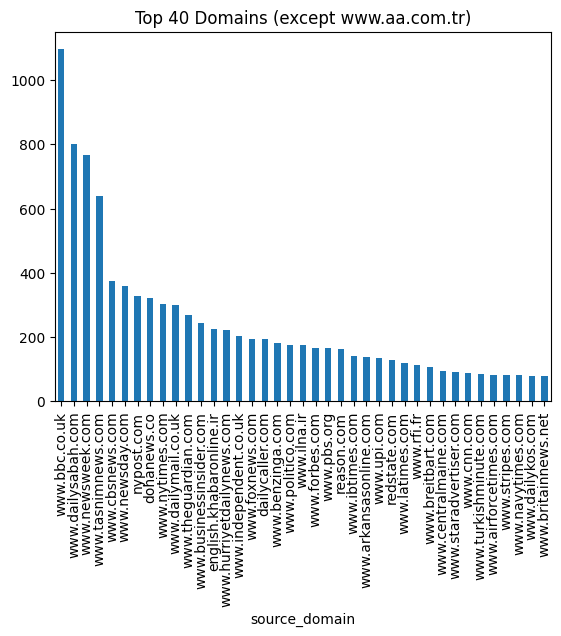

In [206]:
all_df["source_domain"].value_counts()[1:40].plot(kind='bar', title="Top 40 Domains (except www.aa.com.tr)")

In [207]:
all_df['title_len'] = all_df['title'].apply(lambda x: len(str(x).split()))
all_df['text_len'] = all_df['maintext'].apply(lambda x: len(str(x).split()))

<Axes: title={'center': 'Title Length Distribution'}, ylabel='Frequency'>

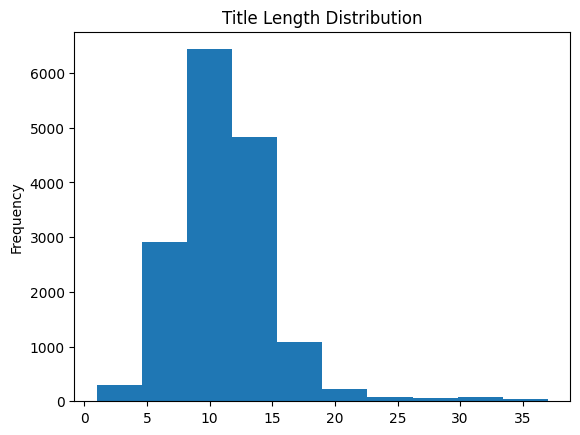

In [208]:
all_df['title_len'].plot(kind='hist', title="Title Length Distribution")

In [209]:
all_df.dropna(subset=['maintext','title'], inplace=True)
all_df = all_df[all_df['title_len'] > 5]

In [210]:
titles = all_df.title.values
texts = all_df.maintext.values

In [211]:
tfidf = TfidfVectorizer(min_df=2, stop_words='english')
tf_idf_words = tfidf.fit_transform(all_df['title'])
tf_idf_feature_array = np.array(tfidf.get_feature_names_out())
tfidf_sorting = np.argsort(tf_idf_words.toarray()).flatten()[::-1]
n = 30
top_n = tf_idf_feature_array[tfidf_sorting][:n]
top_n

array(['morocco', 'tunisia', 'demonstrators', 'rally', 'support',
       'palestinians', 'gaza', 'evacuated', 'evaluated', 'evacuating',
       'evacuation', 'evacuate', 'eurovision', 'evacuations', 'evacuees',
       'evade', 'evacuates', 'evaluates', 'european', 'evangelical',
       'evangelicals', 'eve', 'evening', 'event', 'events', 'evidence',
       'evident', 'evil', 'evolution', 'euros'], dtype=object)

In [166]:
topic_model = BERTopic(language="english", min_topic_size=50)
topics, probs = topic_model.fit_transform(titles)

In [168]:
#topic_model.get_topic_info().to_csv("../data/outputs/topic_info_min50.csv")

In [212]:
selected_topic_df = pd.read_csv("../data/outputs/topic_info_min50.csv")
topic_mapping = selected_topic_df[['Topic','Relevant']].set_index('Topic')
selected_topics = list(topic_mapping[topic_mapping['Relevant'] == 1].index.values)

In [213]:
all_df['topic'] = topics

In [215]:
all_df = all_df[all_df['topic'].isin(selected_topics)]

In [216]:
all_df.to_csv("../data/processed/selected_data.csv", index=False)

In [219]:
topic_model = BERTopic(language="english", min_topic_size=20)
topics, probs = topic_model.fit_transform(all_df['maintext'])

In [220]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2035,-1_the_of_and_in,"[the, of, and, in, to, that, gaza, for, israel...","[DEIR AL-BALAH, Gaza Strip — Israel's governme..."
1,0,3429,0_cookies_analytics_used_is,"[cookies, analytics, used, is, alexa, cookie, ...",[Necessary Cookies\nThis cookie is used to dis...
2,1,731,1_hostages_hamas_the_of,"[hostages, hamas, the, of, in, and, released, ...",[Thirteen Israeli hostages kidnapped by Hamas ...
3,2,410,2_hospital_the_said_and,"[hospital, the, said, and, hamas, alshifa, of,...",[Two and a half weeks after sending tanks and ...
4,3,408,3_the_and_of_regime,"[the, and, of, regime, in, zionist, iran, to, ...",[Kanaani made these remarks during his weekly ...
5,4,220,4_court_genocide_south_africa,"[court, genocide, south, africa, the, case, is...","[THE HAGUE, Netherlands — Accused of committin..."
6,5,199,5_gaza_in_the_of,"[gaza, in, the, of, and, israeli, said, killed...","[By NAJIB JOBAIN, WAFAA SHURAFA and SAMY MAGDY..."
7,6,155,6_us_iraq_in_syria,"[us, iraq, in, syria, the, iraqi, attack, troo...",[WASHINGTON >> U.S. forces may have mistaken a...
8,7,123,7_protesters_police_london_the,"[protesters, police, london, the, protest, of,...",[Pro-Palestine protesters have been pictured c...
9,8,92,8_gaza_the_in_and,"[gaza, the, in, and, netanyahu, of, israel, sa...",[Israel's prime minister pushed back Saturday ...
